<a href="https://colab.research.google.com/github/bcazaubon72/Coursera_Capstone/blob/master/List_of_postal_codes_of_Canada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Installing of requests 

In [0]:
pip install geopy                                 

 *Importing of Beautifulsoup,requests and pandas libraries*

In [0]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from sklearn.cluster import KMeans
import folium
from geopy import Nominatim
from sklearn.preprocessing import  StandardScaler,LabelEncoder
import matplotlib.pyplot as plt
import numpy as np


*Loading url into a beautifulsoup object.italicized text*

In [0]:
r = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
soup = BeautifulSoup(r.content,'lxml')

Find table element in beautiful object  and reading in html object.

In [0]:
table = soup.find_all('table')
df = pd.read_html(str(table))[0]

 *Removing all  rows marked 'Not assigned' in column 'Borough'*

In [0]:

data = df[df['Borough']!= 'Not assigned']

*Group dataframe by 'Postal Code' so 'Neighborhood' with similar postal code can be placed on one line*

In [0]:
data1 = data.groupby(df['Postal Code'],as_index=False)

*Turn  dataframe groupby object into dateframe. Then reset index and drop the index column* 

In [0]:
data2=data1.head(179)
data2=data2.reset_index().drop(columns='index')

In [19]:
data2.head()

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [20]:
data2.shape

(103, 3)

In [21]:
sr= data2['Postal Code'].sort_values(ascending=True)
sr[0]

'M3A'

In [22]:
pip install geocoder

In [0]:
import geocoder # import geocoder



*Reading in the Geospatial_Coordinates csv and merging the newly formed dataframe with the previous built one*

In [0]:
data3 = pd.read_csv('/content/Geospatial_Coordinates.csv')


In [25]:
new_df = pd.merge(data2,data3)
new_df

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


In [26]:
address = 'TORONTO, CA'

geolocator = Nominatim(user_agent="Toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


In [27]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(new_df['Latitude'], new_df['Longitude'], new_df['Borough'], new_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [28]:
new_df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [0]:
X = new_df
y = new_df.iloc[:,:1]
 

In [0]:
X['Borough'] = X['Borough'].str.replace(" ","")
X['Neighborhood'] = X['Neighborhood'].str.replace(" ","")

In [0]:
#y= pd.DataFrame(y)
y = np.array(y).reshape(-1,)

Turning categorical elements to numeric 

In [0]:

number = LabelEncoder()
y_kmm = number.fit_transform(y)
X['Postal Code'] = number.fit_transform(X['Postal Code'])
X['Borough'] = number.fit_transform(X['Borough'])
X['Neighborhood'] = number.fit_transform(X['Neighborhood'])

*normalizing of data*

In [0]:
scaler =  StandardScaler()
scaleddf= scaler.fit_transform(X,y=None)

In [37]:
clusterNum = 4

#manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12).fit(scaleddf)
f_kmeans= kmeans.fit(X)
# check cluster labels generated for each row in the dataframe
label = f_kmeans.labels_[:] 
y_km =kmeans.fit_predict(X)
label

array([1, 1, 1, 3, 3, 3, 0, 0, 1, 2, 2, 3, 1, 0, 1, 1, 2, 2, 0, 1, 2, 2,
       1, 1, 2, 2, 0, 0, 0, 1, 1, 2, 1, 0, 1, 0, 2, 3, 0, 0, 0, 1, 1, 2,
       0, 1, 0, 0, 2, 3, 3, 0, 1, 0, 1, 2, 2, 3, 0, 1, 0, 1, 3, 3, 3, 0,
       1, 2, 2, 2, 3, 1, 1, 1, 3, 3, 2, 3, 0, 2, 3, 3, 0, 1, 2, 0, 1, 2,
       3, 3, 1, 1, 3, 2, 3, 1, 1, 2, 3, 2, 2, 3, 3], dtype=int32)

adding label column to dataframe

In [38]:
X["Clus_km"]= label


,Postal Code,Borough,Neighborhood,Latitude,Longitude,Clus_km
0,25,6,62,43.753259,-79.329656,1
1,34,6,87,43.725882,-79.315572,1
2,53,1,64,43.654260,-79.360636,1
3,71,6,46,43.718518,-79.464763,3
4,85,1,63,43.662301,-79.389494,3


In [39]:
X.groupby('Clus_km').mean()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
Clus_km,,,,,
0,18.608696,6.173913,24.434783,43.750271,-79.333527
1,33.290323,3.677419,75.903226,43.722171,-79.346956
2,69.160000,3.520000,20.160000,43.666351,-79.427591
3,86.000000,4.541667,63.583333,43.678012,-79.491259


In [0]:
k_means_cluster_centers = kmeans.cluster_centers_


using the elbow method to find the best K

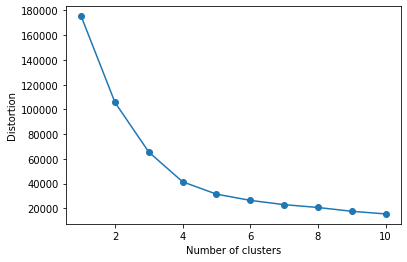

In [41]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

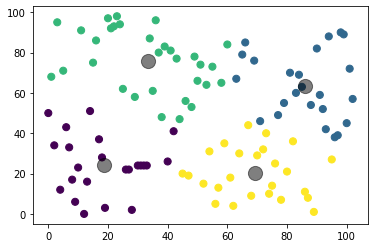

In [42]:
from sklearn.metrics import pairwise_distances_argmin
plt.scatter(X.iloc[:, 0], X.iloc[:, 2], c=y_km, s=50, cmap='viridis')


centers = kmeans.cluster_centers_
plt.scatter(k_means_cluster_centers[:, 0], k_means_cluster_centers[:, 2], c='black', s=200, alpha=0.5);